In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = './data'
df = pd.read_csv(data_path + '/EURGBP-2023-01.csv', header=None, usecols=[1,2,3])
df.head()

,1,2,3
0,20230101 22:09:22.716,0.88299,0.88601
1,20230101 22:10:00.185,0.87962,0.88829
2,20230101 22:10:08.009,0.87961,0.88829
3,20230101 22:10:09.040,0.87963,0.88829
4,20230101 22:10:12.796,0.87949,0.88906


In [3]:
df.rename(columns={1: 'd', 2: 'b', 3: 's'}, inplace=True)

In [4]:
df.head()

,d,b,s
0,20230101 22:09:22.716,0.88299,0.88601
1,20230101 22:10:00.185,0.87962,0.88829
2,20230101 22:10:08.009,0.87961,0.88829
3,20230101 22:10:09.040,0.87963,0.88829
4,20230101 22:10:12.796,0.87949,0.88906


In [5]:
dates = df['d']
type(dates)

pandas.core.series.Series

In [6]:
type(dates[0])

str

In [7]:
dates = pd.to_datetime(dates)

In [8]:
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
diffs = dates.diff().dt.total_seconds()
diffs.head()

0       NaN
1    37.469
2     7.824
3     1.031
4     3.756
Name: d, dtype: float64

In [10]:
len(dates), len(diffs)

(7503011, 7503011)

In [11]:
diffs = diffs[1:]
diffs.describe()

count    7.503010e+06
mean     3.463460e-01
std      1.303739e+02
min     -5.000000e-03
25%      1.600000e-02
50%      4.700000e-02
75%      1.280000e-01
max      1.734033e+05
Name: d, dtype: float64

In [12]:
diffs = diffs * 1000
diffs

1          37469.0
2           7824.0
3           1031.0
4           3756.0
5            644.0
            ...   
7503006       15.0
7503007       16.0
7503008       15.0
7503009      207.0
7503010       93.0
Name: d, Length: 7503010, dtype: float64

In [13]:
diffs.describe()

count    7.503010e+06
mean     3.463460e+02
std      1.303739e+05
min     -5.000000e+00
25%      1.600000e+01
50%      4.700000e+01
75%      1.280000e+02
max      1.734033e+08
Name: d, dtype: float64

max is too much so mean might be skewed
median is 47 milliseconds but mean is 346 milliseconds 

Initial plot of fx

<Axes: xlabel='d'>

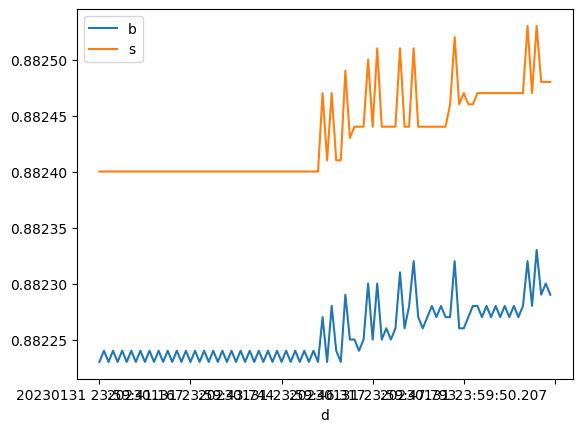

In [14]:
df.tail(100).plot(x='d', y=['b', 's'])


<Axes: xlabel='d'>

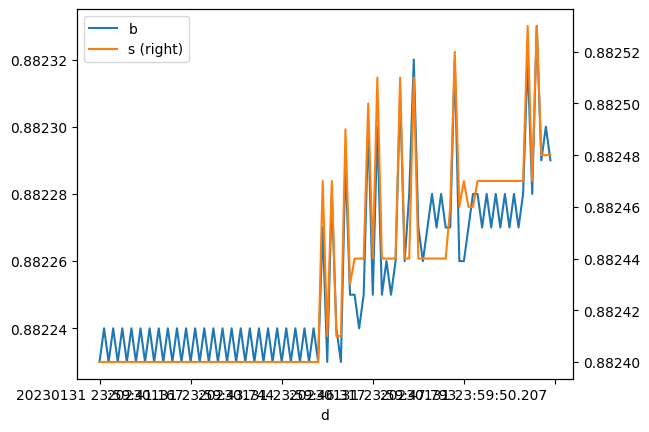

In [15]:
df.tail(100).plot(x='d', y=['b', 's'], secondary_y='s')

<Axes: xlabel='d'>

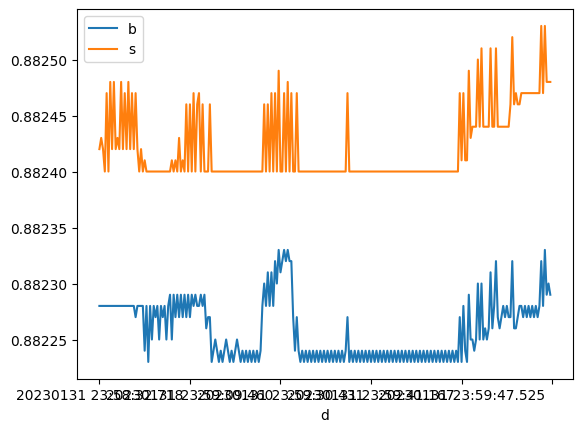

In [16]:
df.tail(250).plot(x='d', y=['b', 's'])

In [17]:
df['d'] = pd.to_datetime(df['d'])
resampled_df = df.set_index('d').resample('1S').last()
resampled_df.head()

,b,s
d,,
2023-01-01 22:09:22,0.88299,0.88601
2023-01-01 22:09:23,NaN,NaN
2023-01-01 22:09:24,NaN,NaN
2023-01-01 22:09:25,NaN,NaN
2023-01-01 22:09:26,NaN,NaN


In [18]:
resampled_df.ffill(inplace=True)
resampled_df.head()

,b,s
d,,
2023-01-01 22:09:22,0.88299,0.88601
2023-01-01 22:09:23,0.88299,0.88601
2023-01-01 22:09:24,0.88299,0.88601
2023-01-01 22:09:25,0.88299,0.88601
2023-01-01 22:09:26,0.88299,0.88601


In [19]:
len(resampled_df)

2598638

<Axes: xlabel='d'>

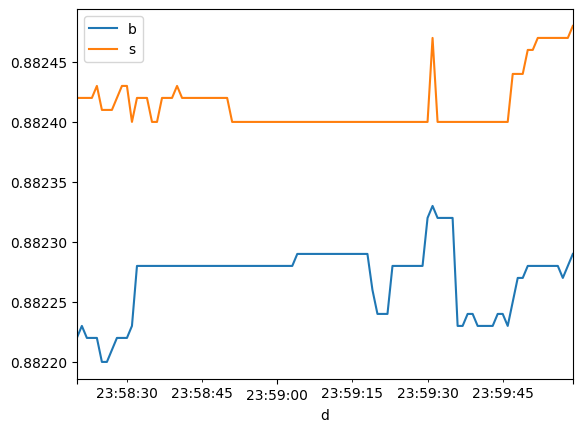

In [22]:
resampled_df.tail(100).plot(y=['b', 's'])

<Axes: xlabel='d'>

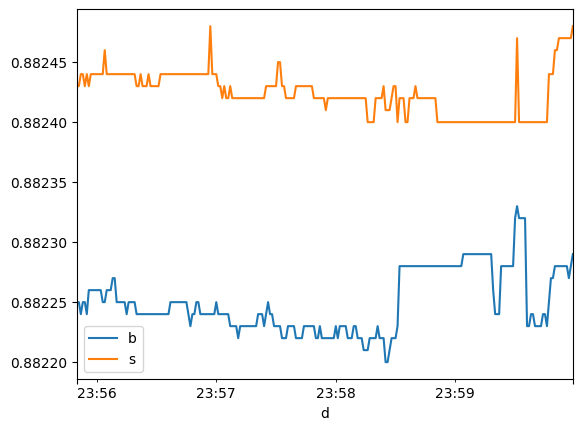

In [23]:
resampled_df.tail(250).plot(y=['b', 's'])

<Axes: xlabel='d'>

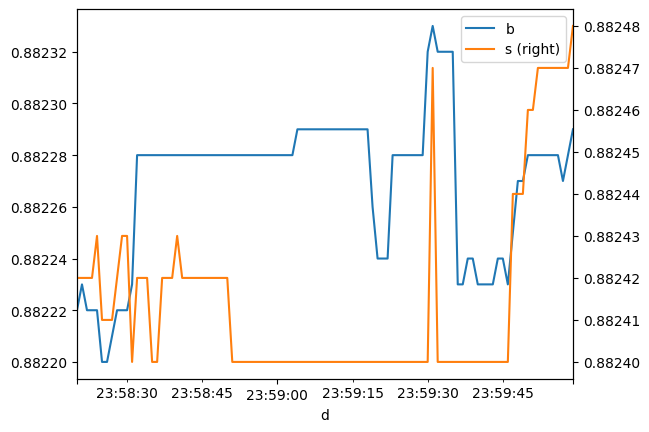

In [24]:
resampled_df.tail(100).plot(y=['b', 's'], secondary_y='s')

<Axes: xlabel='d'>

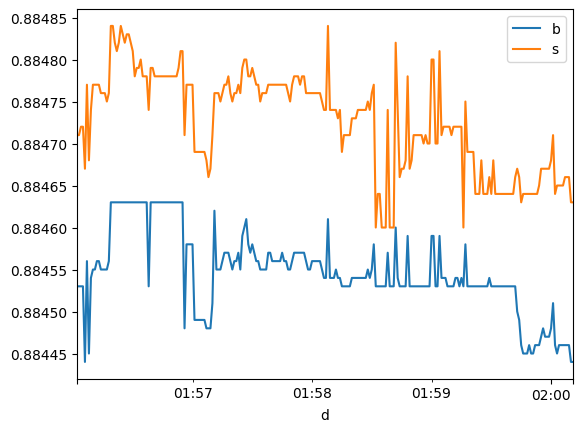

In [27]:
resampled_df[100000:100250].plot(y=['b', 's'])

<Axes: xlabel='d'>

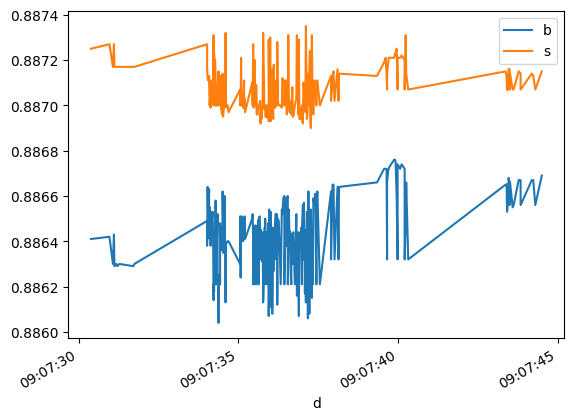

In [28]:
df[100000:100250].plot(x='d', y=['b', 's'])